<a href="https://colab.research.google.com/github/Eric1891/Micro-Credential-winter-2022/blob/main/Iris_Dataset_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#Standardizing Feature values

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [8]:
#standardizing all the feature columns except for the target column, this being 'Species'
scalar.fit(df.drop('Species',axis=1))

StandardScaler()

In [9]:
#stores all of the values for the features of our dataset, not including the target column ('Species')
scaled_features = scalar.transform(df.drop('Species', axis=1))

In [10]:
#create new dataframe that no longer includes target column('Species')
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
df_feature.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


#Splitting dataset into test and train subsets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(scaled_features,df['Species'],test_size=0.3)

#Determine optimal K size(assessing error rate per K value )

In [14]:
error_rate = []
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

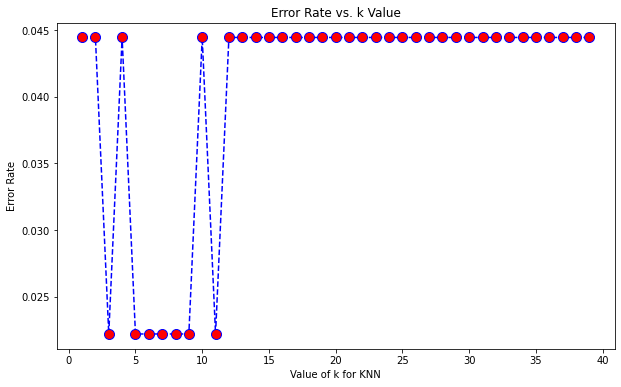

In [15]:
#show error rate against k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('Value of k for KNN') 
plt.ylabel('Error Rate')

#Classify using split data subsets

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
predict=knn.predict(x_test)

#Assess model performance

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
#true data aka y_test, your predictions(aka predict)
print(confusion_matrix(y_test, predict))

[[16  0  0]
 [ 0 14  0]
 [ 0  1 14]]


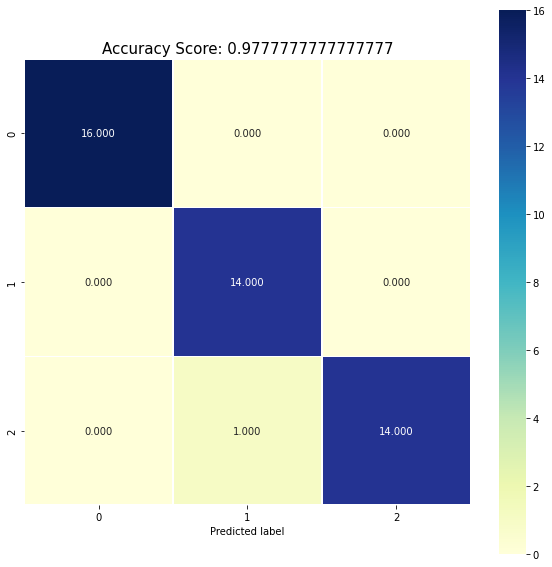

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt= ".3f", linewidths=.5, square= True, cmap = "YlGnBu") #"flare"
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(x_test,y_test)}'
plt.title(all_sample_title, size = 15);
#our knn model had a ___% accuracy score on classifiying the proper target class

#Classification report

In [23]:
#print classification report
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



#Run model with k=36

In [24]:
#building the KNN classifier model
knn=KNeighborsClassifier(n_neighbors=36)

In [25]:
#training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=36)

In [26]:
#stores the predicted y_test values (y_test_predict)
predict=knn.predict(x_test)

In [27]:
print(confusion_matrix(y_test, predict))

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]


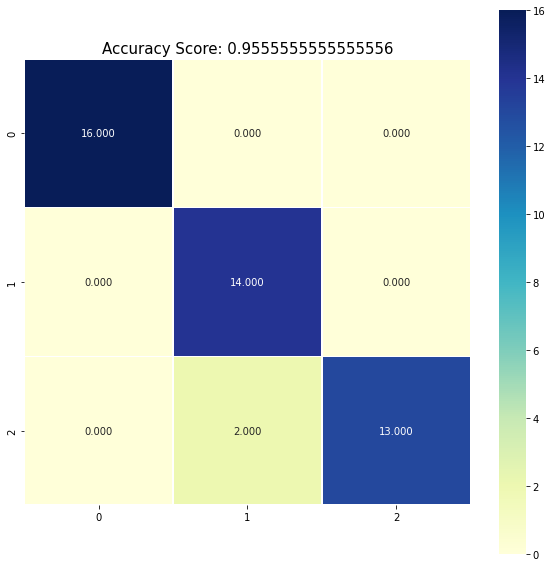

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(x_test,y_test)}'
plt.title(all_sample_title, size = 15);
#our knn model had a 100% accuracy score in classifiying the proper target class

In [29]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [30]:
#We see that when k=36, the accuracy score of this knn classifier model decreases by approximately 7%

#Updating test_size to 20% and testing different k size values

In [31]:
X_train, X_test, y_train, y_test=train_test_split(scaled_features, df['Species'], test_size=0.2)

#K Value and Accuracy

In [32]:
from sklearn import metrics

In [33]:
score=[]

In [35]:
for i in range(1,40): 
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))        

print(score)
#To measure the accuracy of each of the iteration, where you increment the amount of neighbors

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


TypeError: ignored

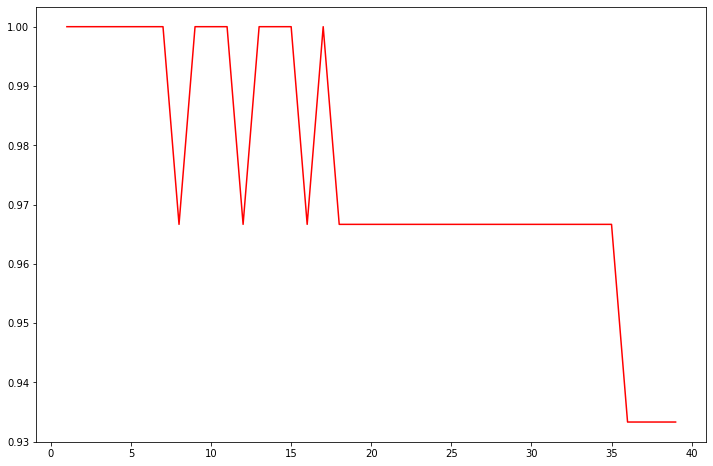

In [36]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color='red')
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')